<a href="https://colab.research.google.com/github/jpbezerra/projeto-estatistica/blob/main/estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise acerca da performance dos estudantes

- O dataset retrata uma análise acerca da performance dos estudantes do ensino médio de uma escola localizada nos Estados Unidos.
- [Link do dataset](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data)

In [ ]:
data <- read.csv("StudentsPerformance.csv", sep = ",")

# Tipos de variáveis do dataset

- "gender": variável qualitativa nominal, gênero dos estudantes
  - Pode ser "female" ou "male"

- "race/ethnicity": variável qualitativa nominal, raça/etnia dos estudantes
 - Pode ser "Group A", "Group B", "Group C", "Group D" ou "Group E"

- "parental level of education": variável qualitativa ordinal, nível de educação parental dos estudantes
  - Pode ser "associate's degree", "bachelor's degree", "high school", "master's degree", "some college" ou "some high school"

- "lunch": variável qualitativa nominal, almoço dos estudantes
  - Pode ser "free/reduced" ou "standard"

- "test preparation course": variável qualitativa ordinal, curso de preparação para testes
  - Pode ser "completed" ou "none"

- "math score": variável quantitativa discreta, nota do estudante em matemática
  - Pode ser qualquer número inteiro no intervalo 0-100

- "reading score": variável quantitativa discreta, nota do estudante em leitura
  - Pode ser qualquer número inteiro no intervalo 0-100
  
- "writing score": variável quantitativa discreta, nota do estudante em escrita
  - Pode ser qualquer número inteiro intervalo 0-100

# Medidas de posição e desvio padrão

In [ ]:
math_score <- data$math.score
reading_score <- data$reading.score
writing_score <- data$writing.score

media_mat <- mean(math_score)
media_reading <- mean(reading_score)
media_writing <- mean(writing_score)

mediana_mat <- median(math_score)
mediana_reading <- median(reading_score)
mediana_writing <- median(writing_score)

dp_mat <- sd(math_score)
dp_reading <- sd(reading_score)
dp_writing <- sd(writing_score)

aux <- sprintf("Nota de matemática:\nMédia: %f\nMediana: %f\nDesvio padrão: %f\n", media_mat, mediana_mat, dp_mat)
cat(aux)

aux <- sprintf("\nNota de leitura:\nMédia: %f\nMediana: %f\nDesvio padrão: %f\n", media_reading, mediana_reading, dp_reading)
cat(aux)

aux <- sprintf("\nNota de escrita:\nMédia: %f\nMediana: %f\nDesvio padrão: %f", media_writing, mediana_writing, dp_writing)
cat(aux)

Nota de matemática:
Média: 66.089000
Mediana: 66.000000
Desvio padrão: 15.163080

Nota de leitura:
Média: 69.169000
Mediana: 70.000000
Desvio padrão: 14.600192

Nota de escrita:
Média: 68.054000
Mediana: 69.000000
Desvio padrão: 15.195657

- Podemos perceber que as médias, medianas e desvios padrão das notas de matemática, leitura e escrita possuem valores parecidos.

# Gráficos

## Relação entre a leitura e a escrita

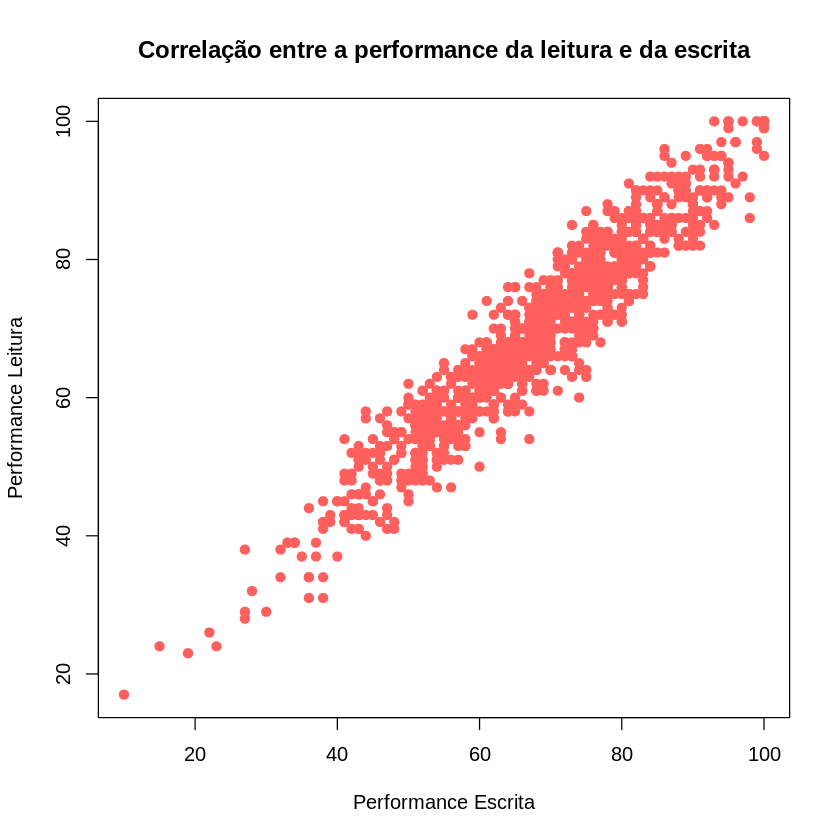

In [ ]:
plot(writing_score, reading_score, main = "Correlação entre a performance da leitura e da escrita",
xlab = "Performance Escrita", ylab = "Performance Leitura", col = "#FF5F5D", pch = 20, cex = 1.5)

- No gráfico acima, podemos perceber que a leitura e escrita possui uma forte relação positiva, o que já podia ter sido observada dada as medidas de posição e desvio padrão.
- Nesse sentido, é razoável inferir que quanto mais desenvolvida a habilidade e o hábito de leitura de uma pessoa, melhor tende a ser a sua performance em escrita.

## Relação entre o gênero e o desempenho em matemática, escrita e leitura

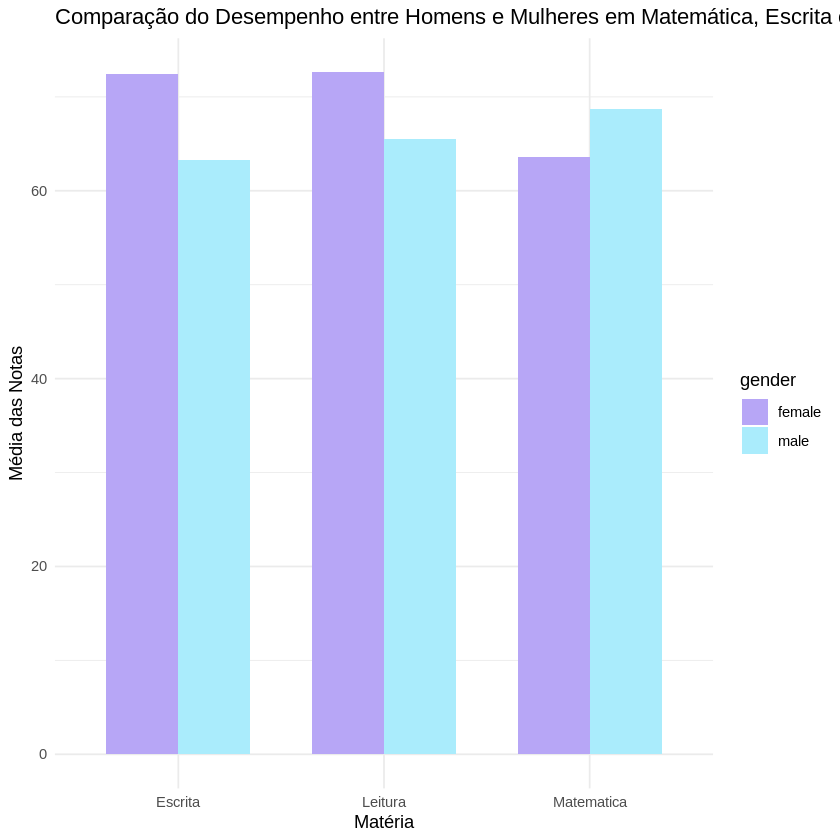

In [ ]:
library(ggplot2)
library(dplyr)
library(tidyr)

data_long <- data %>%
  pivot_longer(cols = c(math.score, reading.score, writing.score),
               names_to = "area",
               values_to = "score") %>%
  mutate(area = case_when(
    area == "math.score" ~ "Matematica",
    area == "reading.score" ~ "Leitura",
    area == "writing.score" ~ "Escrita"
  ))

summary_data <- data_long %>%
  group_by(gender, area) %>%
  summarise(mean_score = mean(score, na.rm = TRUE), .groups = 'drop')

ggplot(summary_data, aes(x = area, y = mean_score, fill = gender)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.7), width = 0.7) +
  labs(x = "Matéria", y = "Média das Notas",
       title = "Comparação do Desempenho entre Homens e Mulheres em Matemática, Escrita e Leitura") +
  theme_minimal() +
  scale_fill_manual(values = c("#B7A6F6", "#AAECFC"))

- Do que se pode interpretar do gráfico, vemos que as mulheres tendem a ter um desempenho melhor na escrita e leitura enquanto que os homens tendem a ter melhor desempenho na matemática (Teste de hipótese na seção Testes de hipótese -> Hipótese 2).

## Relação entre o nível de ensino dos pais dos estudantes e a nota de matemática dos estudantes

### Todas as notas

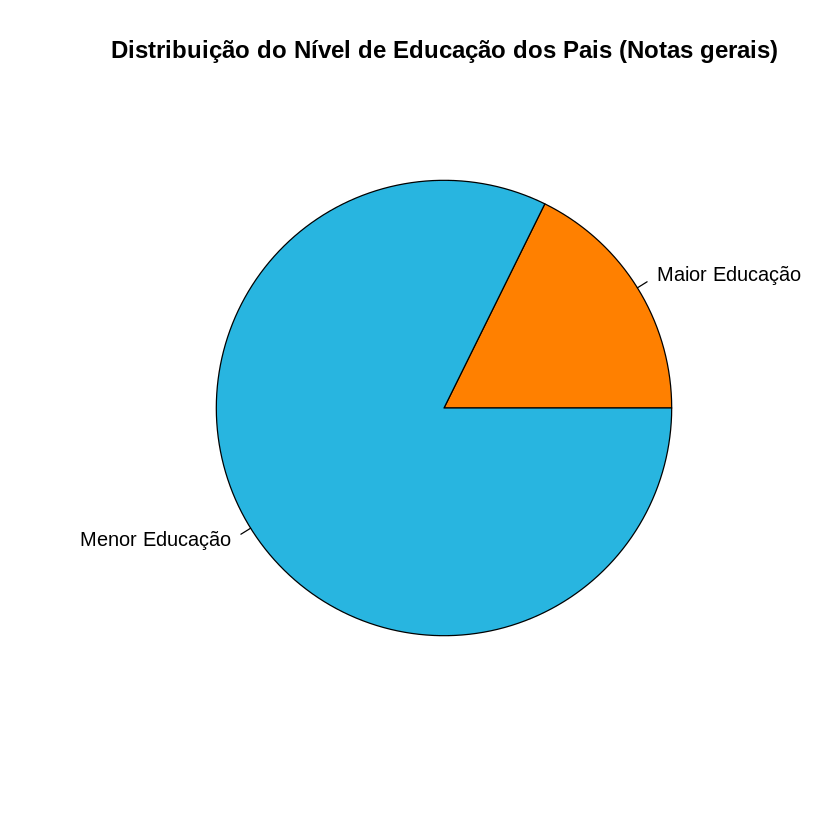

In [ ]:
educacaoParental <- data$parental.level.of.education
educacaoParental <- ifelse(educacaoParental %in% c("master's degree", "bachelor's degree"),
                           "Maior Educação",
                           "Menor Educação")

educacao_freq <- table(educacaoParental)

pie(educacao_freq, main = "Distribuição do Nível de Educação dos Pais (Notas gerais)", col = c("#FF8000", "#28B5E0"))

### Notas de matemática maiores ou iguais à 90

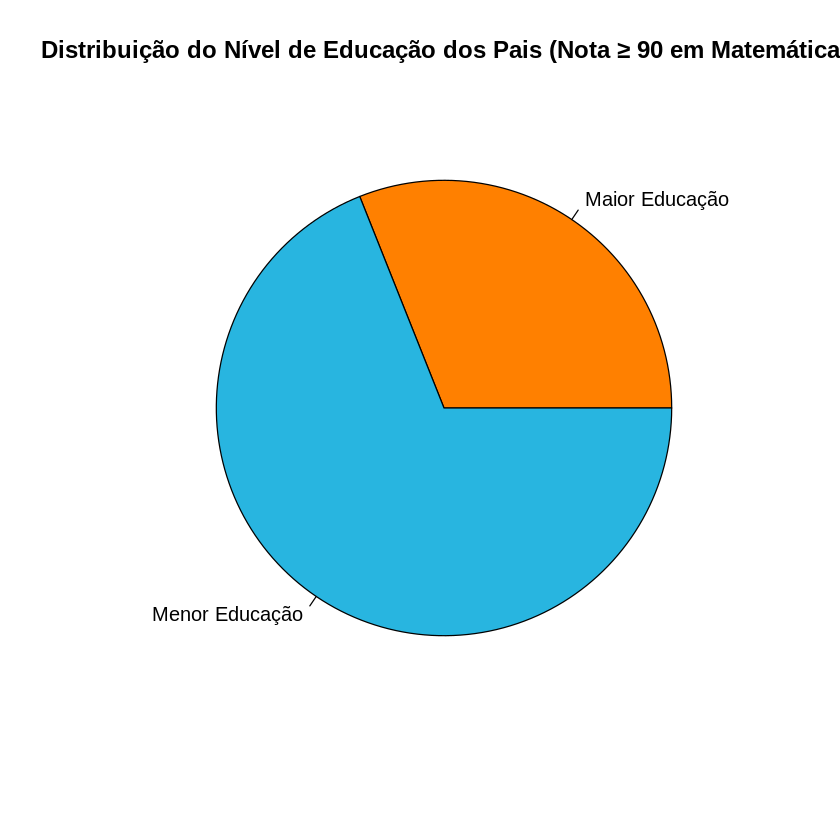

In [ ]:
filtered_data <- subset(data, math.score >= 90)

educacaoParental <- filtered_data$parental.level.of.education
educacaoParental <- ifelse(educacaoParental %in% c("master's degree", "bachelor's degree"),
                           "Maior Educação",
                           "Menor Educação")

educacao_freq <- table(educacaoParental)

pie(educacao_freq, main = "Distribuição do Nível de Educação dos Pais (Nota ≥ 90 em Matemática)", col = c("#FF8000", "#28B5E0"))

### Conclusão
- Diante da análise dos gráficos, é percepitível que a medida que a média das notas de matemática aumentam; há um aumento percentual dos estudantes cujos pais possuem um maior nível de educação.

# Testes de Hipótese

## Hipótese 1:
- Os estudantes que possuem pais com mestrado ou bacharelado tendem a ter melhor desempenho nas matérias em relação aos estudantes com pais de nível de educação inferior à estes.

In [ ]:
ed <- data$parental.level.of.education

### Matemática

In [ ]:
# notas do estudantes que possuem pais com nível de educação mestrado ou bacharelado
math_better_ed <- math_score[ed == "master's degree"]
math_better_ed <- c(math_better_ed, math_score[ed == "bachelor's degree"])

# notas do estudantes que não possuem pais com nível de educação mestrado ou bacharelado
math_worse_ed <- math_score[-math_better_ed]

# teste de hipótese - uniteral à direita
# H0: a média de math_better_ed não é maior que a média de math_worse_ed
# HA: a média de math_better_ed é maior que a média de math_worse_ed
# Nível de significância de 5%
teste_mat <- t.test(math_better_ed, math_worse_ed, alternative = "greater")
aux <- sprintf("(MATEMÁTICA)\nEstatística do teste: %f\nP-value: %f", teste_mat$statistic, teste_mat$p.value)
cat(aux)

(MATEMÁTICA)
Estatística do teste: 2.470193
P-value: 0.007088

- Conclusão: como o P-value é menor que o nível de significância do teste (0.05), devemos rejeitar a hipótese nula, portanto, temos evidências o suficiente para afirmar que os estudantes cujos pais possuem nível de educação superior (mestrado ou bacharelado) tendem a ter melhor desempenho em matemática em relação aos estudantes cujos pais possuem nível de educação que não seja mestrado nem bacharelado.

### Leitura

In [ ]:
# notas do estudantes que possuem pais com nível de educação mestrado ou bacharelado
read_better_ed <- reading_score[ed == "master's degree"]
read_better_ed <- c(read_better_ed, reading_score[ed == "bachelor's degree"])

# notas do estudantes que não possuem pais com nível de educação mestrado ou bacharelado
read_worse_ed <- reading_score[-read_better_ed]

# teste de hipótese - unilateral à direita
# H0: a média de read_better_ed não é maior que a média de read_worse_ed
# HA: a média de read_better_ed não é maior que a média de read_worse_ed
# Nível de significância de 5%
teste_read <- t.test(read_better_ed, read_worse_ed, alternative = "greater")
aux <- sprintf("(LEITURA)\nEstatística do teste: %f\nP-value: %f", teste_read$statistic, teste_read$p.value)
cat(aux)

(LEITURA)
Estatística do teste: 3.582222
P-value: 0.000205

- Conclusão: como o P-value é menor que o nível de significância do teste (0.05), devemos rejeitar a hipótese nula, portanto, temos evidências o suficiente para afirmar que os estudantes cujos pais possuem nível de educação superior (mestrado ou bacharelado) tendem a ter melhor desempenho em leitura em relação aos estudantes cujos pais possuem nível de educação que não seja mestrado nem bacharelado.

### Escrita

In [ ]:
# notas do estudantes que possuem pais com nível de educação mestrado ou bacharelado
write_better_ed <- writing_score[ed == "master's degree"]
write_better_ed <- c(write_better_ed, writing_score[ed == "bachelor's degree"])

# notas do estudantes que não possuem pais com nível de educação mestrado ou bacharelado
write_worse_ed <- writing_score[-write_better_ed]

# teste de hipótese - unilateral à direita
# H0: a média de write_better_ed não é maior que a média de write_worse_ed
# HA: a média de write_better_ed não é maior que a média de write_worse_ed
# Nível de significância de 5%
teste_write <- t.test(write_better_ed, write_worse_ed, alternative = "greater")
aux <- sprintf("(ESCRITA)\nEstatística do teste: %f\nP-value: %f", teste_write$statistic, teste_write$p.value)
cat(aux)

(ESCRITA)
Estatística do teste: 4.799737
P-value: 0.000001

- Conclusão: como o P-value é menor que o nível de significância do teste (0.05), devemos rejeitar a hipótese nula, portanto, temos evidências o suficiente para afirmar que os estudantes cujos pais possuem nível de educação superior (mestrado ou bacharelado) tendem a ter melhor desempenho em escrita em relação aos estudantes cujos pais possuem nível de educação que não seja mestrado nem bacharelado.

### Conclusão do teste de hipótese

- O nível de educação dos pais dos estudantes de fato influencia no desempenho escolar do estudante em todas as matérias da base de dados.
- Quanto maior for o nível de educação parental, mais o filho melhor tende a ser a performance estudantil nos exames escolares.

## Hipótese 2:
- Há uma diferença no desempenho escolar com base na identidade de gênero do estudante.

In [ ]:
gender <- data$gender

### Matemática

In [ ]:
math_female <- math_score[gender == "female"] # notas em matemática das mulheres
math_male <- math_score[gender == "male"] # notas em matemática dos homens

# teste de hipótese - unilateral à direita
# H0: a média em matemática das mulheres é menor ou igual à média em matemática dos homens
# HA: a média em matemática das mulheres é maior que a média em matemática dos homens
# Nível de significância de 5%
teste_mat <- t.test(math_female, math_male, alternative = "greater")
aux <- sprintf("(MATEMÁTICA)\nEstatística do teste: %f\nP-value: %f", teste_mat$statistic, teste_mat$p.value)
cat(aux)

(MATEMÁTICA)
Estatística do teste: -5.398001
P-value: 1.000000

- Conclusão: como o P-value é maior que o nível de significância do teste (0.05), não devemos rejeitar a hipótese nula e, portanto, temos evidências o suficiente para especular que os homens, em média, possuem um desempenho melhor em matemática em relação às mulheres.

### Leitura

In [ ]:
read_female <- reading_score[gender == "female"] # notas em leitura das mulheres
read_male <- reading_score[gender == "male"] # notas em leitura dos homens

# teste de hipótese - unilateral à direita
# H0: a média em leitura das mulheres é menor ou igual à média em leitura dos homens
# HA: a média em leitura das mulheres é maior que a média em leitura dos homens
# Nível de significância de 5%
teste_read <- t.test(read_female, read_male, alternative = "greater")
aux <- sprintf("(LEITURA)\nEstatística do teste: %f\nP-value: %f", teste_read$statistic, teste_read$p.value)
cat(aux)

(LEITURA)
Estatística do teste: 7.968357
P-value: 0.000000

- Conclusão: como o P-value é menor que o nível de significância do teste (0.05), devemos rejeitar a hipótese nula e, portanto, temos evidências o suficiente para especular que as mulheres, em média, possuem um desempenho melhor em leitura em relação aos homens.

### Escrita

In [ ]:
write_female <- writing_score[gender == "female"] # notas em escrita das mulheres
write_male <- writing_score[gender == "male"] # notas em escrita dos homens

# teste de hipótese - unilateral à direita
# H0: a média em escrita das mulheres é menor ou igual à média em escrita dos homens
# HA: a média em escrita das mulheres é maior que a média em escrita dos homens
# Nível de significância de 5%
teste_write <- t.test(write_female, write_male, alternative = "greater")
aux <- sprintf("(ESCRITA)\nEstatística do teste: %f\nP-value: %f", teste_write$statistic, teste_write$p.value)
cat(aux)

(ESCRITA)
Estatística do teste: 9.997719
P-value: 0.000000

- Conclusão: como o P-value é menor que o nível de significância do teste (0.05), devemos rejeitar a hipótese nula e, portanto, temos evidências o suficiente para especular que as mulheres, em média, possuem um desempenho melhor em escrita em relação aos homens.

### Conclusão do teste de hipótese

- Podemos concluir que as mulheres têm a tendência de alcançar melhores desempenhos em testes de escrita e leitura enquanto que os homens, por outro lado, têm a tendência de destacar-se mais em testes de matemática.